In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
!pip install --upgrade ipython
import warnings
warnings.simplefilter(action='ignore', category=DeprecationWarning)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 826.7/826.7 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 6.2 MB/s eta 0:00:00
  Attempting uninstall: traitlets
    Found existing installation: traitlets 5.7.1
    Uninstalling traitlets-5.7.1:
      Successfully uninstalled traitlets-5.7.1
  Attempting uninstall: ipython
    Found existing installation: ipython 7.34.0
    Uninstalling ipython-7.34.0:
      Successfully uninstalled ipython-7.34.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipython==7.34.0, but you have ipython 8.34.0 which is incompatible.
google-colab 1.0.0 requires notebook==6.5.5, but you have notebook 6.5.4 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.


In [2]:
import kagglehub

path = kagglehub.dataset_download("frtgnn/dunnhumby-the-complete-journey")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/dunnhumby-the-complete-journey


In [3]:
import os
import pandas as pd
path = "/kaggle/input/dunnhumby-the-complete-journey"

files = os.listdir(path)

dataframes = {}

for file in files:
    if file.endswith('.csv'):
        file_path = os.path.join(path, file)
        df_name = file.replace('.csv', '')
        dataframes[df_name] = pd.read_csv(file_path)
        print(f"Loaded {file} into DataFrame '{df_name}'")
        print(dataframes[df_name].head())

Loaded campaign_table.csv into DataFrame 'campaign_table'
  DESCRIPTION  household_key  CAMPAIGN
0       TypeA             17        26
1       TypeA             27        26
2       TypeA            212        26
3       TypeA            208        26
4       TypeA            192        26
Loaded causal_data.csv into DataFrame 'causal_data'
   PRODUCT_ID  STORE_ID  WEEK_NO display mailer
0       26190       286       70       0      A
1       26190       288       70       0      A
2       26190       289       70       0      A
3       26190       292       70       0      A
4       26190       293       70       0      A
Loaded coupon.csv into DataFrame 'coupon'
    COUPON_UPC  PRODUCT_ID  CAMPAIGN
0  10000089061       27160         4
1  10000089064       27754         9
2  10000089073       28897        12
3  51800009050       28919        28
4  52100000076       28929        25
Loaded campaign_desc.csv into DataFrame 'campaign_desc'
  DESCRIPTION  CAMPAIGN  START_DAY  END_DAY
0   

In [4]:
transaction_data = dataframes['transaction_data']
transaction_data

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0.0,0.0
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0.0,0.0
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0.0,0.0
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0.0,0.0
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2595727,1598,42305362535,711,92130,1,0.99,3228,0.00,1520,102,0.0,0.0
2595728,1598,42305362535,711,114102,1,8.89,3228,0.00,1520,102,0.0,0.0
2595729,1598,42305362535,711,133449,1,6.99,3228,0.00,1520,102,0.0,0.0
2595730,1598,42305362535,711,6923644,1,4.50,3228,-0.49,1520,102,0.0,0.0


In [5]:
#check missing value
missing_values = transaction_data.isnull().sum()
missing_values

household_key        0
BASKET_ID            0
DAY                  0
PRODUCT_ID           0
QUANTITY             0
SALES_VALUE          0
STORE_ID             0
RETAIL_DISC          0
TRANS_TIME           0
WEEK_NO              0
COUPON_DISC          0
COUPON_MATCH_DISC    0
dtype: int64

In [6]:
#convert to datetime
transaction_data['DATE'] = pd.to_datetime('2020-01-01') + pd.to_timedelta(transaction_data['DAY'] - 1, unit='D')

In [7]:
product = dataframes['product']
product

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
1,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,
2,26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
4,26355,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES,14 OZ
...,...,...,...,...,...,...,...
92348,18293142,6384,DRUG GM,National,BOOKSTORE,PAPERBACK BOOKS,
92349,18293439,6393,DRUG GM,National,BOOKSTORE,CHILDRENS LOW END,
92350,18293696,6406,DRUG GM,National,BOOKSTORE,PAPERBACK BEST SELLER,
92351,18294080,6442,DRUG GM,National,BOOKSTORE,PAPERBACK BOOKS,


In [8]:
missing_values = product.isnull().sum()
missing_values

PRODUCT_ID              0
MANUFACTURER            0
DEPARTMENT              0
BRAND                   0
COMMODITY_DESC          0
SUB_COMMODITY_DESC      0
CURR_SIZE_OF_PRODUCT    0
dtype: int64

In [9]:
duplicates = product[product.duplicated()]
num_duplicates = duplicates.shape[0]
duplicates

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT


In [10]:
transaction_data["z_score"] = np.abs(stats.zscore(transaction_data["QUANTITY"]))
outliers_zscore = transaction_data[transaction_data["z_score"] > 3]
print(f"Số lượng outliers theo Z-score: {len(outliers_zscore)}")

Số lượng outliers theo Z-score: 21945


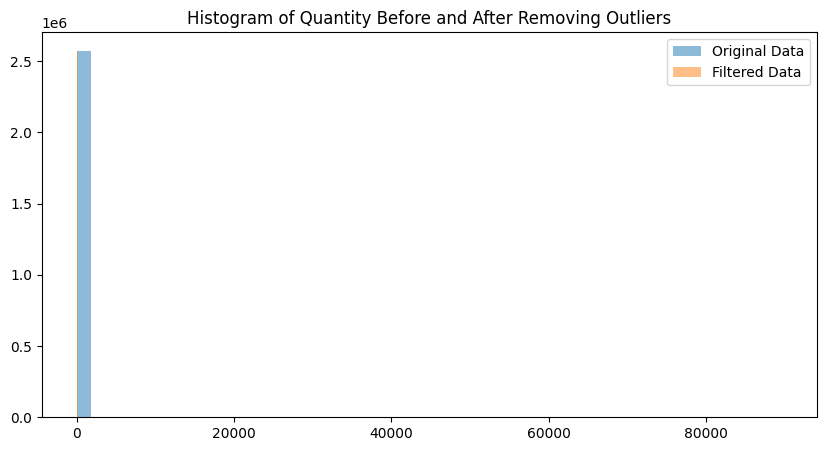

In [11]:
plt.figure(figsize=(10,5))
plt.hist(transaction_data["QUANTITY"], bins=50, alpha=0.5, label="Original Data")
plt.hist(transaction_data[transaction_data["z_score"] <= 3]["QUANTITY"], bins=50, alpha=0.5, label="Filtered Data")
plt.legend()
plt.title("Histogram of Quantity Before and After Removing Outliers")
plt.show()

In [12]:
print(transaction_data.describe())


       household_key     BASKET_ID           DAY    PRODUCT_ID      QUANTITY  \
count   2.595732e+06  2.595732e+06  2.595732e+06  2.595732e+06  2.595732e+06   
mean    1.271953e+03  3.402620e+10  3.887562e+02  2.891435e+06  1.004286e+02   
min     1.000000e+00  2.698485e+10  1.000000e+00  2.567100e+04  0.000000e+00   
25%     6.560000e+02  3.040805e+10  2.290000e+02  9.174590e+05  1.000000e+00   
50%     1.272000e+03  3.276081e+10  3.900000e+02  1.028816e+06  1.000000e+00   
75%     1.913000e+03  4.012685e+10  5.530000e+02  1.133018e+06  1.000000e+00   
max     2.500000e+03  4.230536e+10  7.110000e+02  1.831630e+07  8.963800e+04   
std     7.260660e+02  4.711649e+09  1.897210e+02  3.837404e+06  1.153436e+03   

        SALES_VALUE      STORE_ID   RETAIL_DISC    TRANS_TIME       WEEK_NO  \
count  2.595732e+06  2.595732e+06  2.595732e+06  2.595732e+06  2.595732e+06   
mean   3.104120e+00  3.142673e+03 -5.387054e-01  1.561586e+03  5.622150e+01   
min    0.000000e+00  1.000000e+00 -1.80000

In [13]:
user_item_matrix = transaction_data.pivot_table(
        index='household_key',
        columns='PRODUCT_ID',
        values='SALES_VALUE',
        aggfunc='sum',
        fill_value=0)

In [14]:
min_product_purchases = 10  # Số lần mua tối thiểu của một sản phẩm
min_user_purchases = 2      # Số lần mua tối thiểu của một user
    
product_purchase_count = (user_item_matrix > 0).sum()
user_purchase_count = (user_item_matrix > 0).sum(axis=1)
    
filtered_products = product_purchase_count[product_purchase_count >= min_product_purchases].index
filtered_users = user_purchase_count[user_purchase_count >= min_user_purchases].index

In [15]:
filtered_matrix = user_item_matrix.loc[filtered_users, filtered_products]
print(f"\n2. Filtered Matrix Shape: {filtered_matrix.shape}")


2. Filtered Matrix Shape: (2500, 23326)


In [16]:
transaction_data_cleaned = transaction_data[(transaction_data['z_score'] < 3) & (transaction_data['z_score'] > -3) & (transaction_data['QUANTITY'] > 0)]
print(transaction_data_cleaned.shape)


(2559321, 14)


In [17]:
transaction_data_cleaned

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,DATE,z_score
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0.0,0.0,2020-01-01,0.086202
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0.0,0.0,2020-01-01,0.086202
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0.0,0.0,2020-01-01,0.086202
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0.0,0.0,2020-01-01,0.086202
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0.0,0.0,2020-01-01,0.086202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2595727,1598,42305362535,711,92130,1,0.99,3228,0.00,1520,102,0.0,0.0,2021-12-11,0.086202
2595728,1598,42305362535,711,114102,1,8.89,3228,0.00,1520,102,0.0,0.0,2021-12-11,0.086202
2595729,1598,42305362535,711,133449,1,6.99,3228,0.00,1520,102,0.0,0.0,2021-12-11,0.086202
2595730,1598,42305362535,711,6923644,1,4.50,3228,-0.49,1520,102,0.0,0.0,2021-12-11,0.086202


In [18]:
user_item_matrix = transaction_data_cleaned.pivot_table(
        index='household_key',
        columns='PRODUCT_ID',
        values='SALES_VALUE',
        aggfunc='sum',
        fill_value=0)

# 3. Lọc theo số lượng mua tối thiểu
min_product_purchases = 10  # Số lần mua tối thiểu của một sản phẩm
min_user_purchases = 2      # Số lần mua tối thiểu của một user
    
product_purchase_count = (user_item_matrix > 0).sum()
user_purchase_count = (user_item_matrix > 0).sum(axis=1)
    
filtered_products = product_purchase_count[product_purchase_count >= min_product_purchases].index
filtered_users = user_purchase_count[user_purchase_count >= min_user_purchases].index
filtered_matrix = user_item_matrix.loc[filtered_users, filtered_products]

In [19]:
transaction_data_cleaned = transaction_data_cleaned[
    (transaction_data_cleaned['household_key'].isin(filtered_users)) & 
    (transaction_data_cleaned['PRODUCT_ID'].isin(filtered_products))
]

In [20]:
transaction_data_cleaned

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,DATE,z_score
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0.0,0.0,2020-01-01,0.086202
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0.0,0.0,2020-01-01,0.086202
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0.0,0.0,2020-01-01,0.086202
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0.0,0.0,2020-01-01,0.086202
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0.0,0.0,2020-01-01,0.086202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2595711,2225,42302712298,711,976199,1,2.99,446,0.00,1754,102,0.0,0.0,2021-12-11,0.086202
2595712,2225,42302712298,711,1052686,1,3.99,446,0.00,1754,102,0.0,0.0,2021-12-11,0.086202
2595713,2225,42302712298,711,1110111,1,7.99,446,-0.20,1754,102,0.0,0.0,2021-12-11,0.086202
2595714,2225,42302712298,711,6442722,1,5.49,446,0.00,1754,102,0.0,0.0,2021-12-11,0.086202


In [21]:
merged_data = pd.merge(transaction_data_cleaned, product, on='PRODUCT_ID', how='inner')
merged_data

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,DATE,z_score,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0.0,0.0,2020-01-01,0.086202,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0.0,0.0,2020-01-01,0.086202,2,PRODUCE,National,ONIONS,ONIONS SWEET (BULK&BAG),40 LB
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0.0,0.0,2020-01-01,0.086202,69,PRODUCE,Private,VEGETABLES - ALL OTHERS,CELERY,
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0.0,0.0,2020-01-01,0.086202,2,PRODUCE,National,TROPICAL FRUIT,BANANAS,40 LB
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0.0,0.0,2020-01-01,0.086202,69,PRODUCE,Private,ORGANICS FRUIT & VEGETABLES,ORGANIC CARROTS,1 LB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2347975,2225,42302712298,711,976199,1,2.99,446,0.00,1754,102,0.0,0.0,2021-12-11,0.086202,69,GROCERY,Private,BUTTER,BUTTER,1 LB
2347976,2225,42302712298,711,1052686,1,3.99,446,0.00,1754,102,0.0,0.0,2021-12-11,0.086202,2417,GROCERY,National,DOMESTIC WINE,FIGHTING VARIETAL WINES,750 ML
2347977,2225,42302712298,711,1110111,1,7.99,446,-0.20,1754,102,0.0,0.0,2021-12-11,0.086202,1208,GROCERY,National,SOFT DRINKS,SOFT DRINKS 20PK&24PK CAN CARB,12 OZ
2347978,2225,42302712298,711,6442722,1,5.49,446,0.00,1754,102,0.0,0.0,2021-12-11,0.086202,2296,DRUG GM,National,HAIR CARE PRODUCTS,SHAMPOO,25.4 OZ


In [22]:
transactions = merged_data.groupby('BASKET_ID')['SUB_COMMODITY_DESC'].unique().reset_index()
transactions

,BASKET_ID,SUB_COMMODITY_DESC
0,26984851472,"[POTATOES RUSSET (BULK&BAG), ONIONS SWEET (BUL..."
1,26984851516,"[HAMBURGER BUNS, SPONGES: BATH HOUSEHOLD, TRAY..."
2,26984896261,"[GRANOLA BARS, SNACK CRACKERS, LINKS - RAW, EG..."
3,26984905972,"[RAMEN NOODLES/RAMEN CUPS, MAINSTREAM WHITE BR..."
4,26984945254,"[SEASONAL CANDY BOX NON-CHOCOLA, CHEWING GUM, ..."
...,...,...
244785,42302711057,"[DAIRY CASE 100% PURE JUICE - O, TOOTHPASTE]"
244786,42302711064,"[TUNA, CHICKEN BREAST BONE IN]"
244787,42302712006,"[SFT DRNK 2 LITER BTL CARB INCL, MEXICAN SAUCE..."
244788,42302712189,"[PLSTC CTLRYTBLCLTHSTTHPKSST, REFRIG DIPS, BEE..."


In [23]:
transaction_list = transactions['SUB_COMMODITY_DESC'].tolist()
transaction_list = [list(item) for item in transaction_list]
print(transaction_list[:5])

[['POTATOES RUSSET (BULK&BAG)', 'ONIONS SWEET (BULK&BAG)', 'CELERY', 'BANANAS', 'ORGANIC CARROTS'], ['HAMBURGER BUNS', 'SPONGES: BATH HOUSEHOLD', 'TRAY PACK/CHOC CHIP COOKIES', 'PEANUT BUTTER', 'GRAHAM CRACKERS'], ['GRANOLA BARS', 'SNACK CRACKERS', 'LINKS - RAW', 'EGGS - X-LARGE'], ['RAMEN NOODLES/RAMEN CUPS', 'MAINSTREAM WHITE BREAD'], ['SEASONAL CANDY BOX NON-CHOCOLA', 'CHEWING GUM', 'INSIDE FROST BULBS']]


In [24]:
transactions['num_products'] = transactions['SUB_COMMODITY_DESC'].apply(len)
average_products_per_order = transactions['num_products'].mean()
max_products_per_order = transactions['num_products'].max()
min_products_per_order = transactions['num_products'].min()

print(f"Average number of products per order: {average_products_per_order}")
print(f"Maximum number of products per order: {max_products_per_order}")
print(f"Minimum number of products per order: {min_products_per_order}")

Average number of products per order: 8.162167572204748
Maximum number of products per order: 124
Minimum number of products per order: 1


**ENCODE**

In [25]:
!pip install mlxtend

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 86.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
category-encoders 2.7.0 requires scikit-learn<1.6.0,>=1.0.0, but you have scikit-learn 1.6.1 which is incompatible.


In [26]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(transaction_list).transform(transaction_list)

df_encoded = pd.DataFrame(te_ary, columns=te.columns_).astype(int)

In [27]:
df_encoded.head()

,ABRASIVES,ACCESSORIES,ACNE MEDICATIONS,ADDITIVES/FLUIDS,ADHESIVES/CAULK,ADULT ANALGESICS,ADULT CEREAL,ADULT INCONTINENCE MISC PRODUC,ADULT PREMIUM,AEROSOL DEODORANTS,...,WOMENS HAIR SPRAYS,WRAP,WREATHS,WRITING INSTRUMENTS,XMAS PLUSH,YEAST: DRY,YELLOW SUMMER SQUASH,YOGURT,YOGURT MULTI-PACKS,YOGURT NOT MULTI-PACKS
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**APRIORI**

In [28]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [29]:
filtered_onehot = df_encoded.loc[:, df_encoded.sum(axis=0) > 20]

In [30]:
frequent_itemsets = apriori(filtered_onehot, min_support=0.005, use_colnames=True, low_memory=True)
print(frequent_itemsets.head())

    support              itemsets
0  0.008877    (ADULT ANALGESICS)
1  0.030500        (ADULT CEREAL)
2  0.007897  (ALKALINE BATTERIES)
3  0.041096   (ALL FAMILY CEREAL)
4  0.010997       (ALUMINUM FOIL)


In [31]:
num_itemsets = len(frequent_itemsets)
rules = association_rules (frequent_itemsets, metric="confidence", min_threshold=0.4, num_itemsets = num_itemsets)
print("Association Rules:")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head())
print(rules.shape)


Association Rules:
                       antecedents              consequents   support  \
0                   (ADULT CEREAL)                (BANANAS)  0.012349   
1                   (ADULT CEREAL)  (FLUID MILK WHITE ONLY)  0.019457   
2              (ALL FAMILY CEREAL)  (FLUID MILK WHITE ONLY)  0.026688   
3  (APPLE JUICE & CIDER (OVER 50%)  (FLUID MILK WHITE ONLY)  0.006953   
4         (APPLES GALA (BULK&BAG))                (BANANAS)  0.007190   

   confidence      lift  
0    0.404902  3.273965  
1    0.637959  2.585400  
2    0.649404  2.631782  
3    0.588520  2.385044  
4    0.509259  4.117777  
(468, 14)


In [32]:
print(rules.shape)


(468, 14)


In [33]:
transaction_list = [list(t) if isinstance(t, (list, np.ndarray)) else [t] for t in transaction_list]
transaction_list = [t.tolist() if isinstance(t, np.ndarray) else list(t) if isinstance(t, list) else [t] for t in transaction_list]

In [34]:
rules.to_excel("/kaggle/working/Apriori.xlsx", index=False)

print("File 'association_rules.xlsx' đã được tạo.")

File 'association_rules.xlsx' đã được tạo.


In [35]:
apriori = pd.read_excel("/kaggle/working/Apriori.xlsx")
apriori = apriori.drop(columns=[
    "antecedent support", 
    "consequent support", 
    "representativity", 
    "conviction", 
    "zhangs_metric", 
    "jaccard", 
    "certainty", 
    "kulczynski"
])

In [36]:
apriori.to_excel("/kaggle/working/Apriori_cleaned.xlsx", index=False)


In [37]:
# import os
# os.remove("/kaggle/working/association_rules.xlsx")

**FP-Growth**

In [38]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth, association_rules

In [39]:
frequent_itemsets_fp = fpgrowth(filtered_onehot, min_support=0.005, use_colnames=True)

In [40]:
rules_fp = association_rules(frequent_itemsets, len(frequent_itemsets), metric="confidence", min_threshold=0.4)

In [41]:
from IPython.display import display

print("🔥 Frequent Itemsets (Tập mục phổ biến):")
display(frequent_itemsets_fp)

print("\n🔥 Association Rules (Luật kết hợp):")
display(rules_fp)


🔥 Frequent Itemsets (Tập mục phổ biến):


,support,itemsets
0,0.123673,(BANANAS)
1,0.039054,(POTATOES RUSSET (BULK&BAG))
2,0.024221,(ONIONS SWEET (BULK&BAG))
3,0.019123,(CELERY)
4,0.040851,(HAMBURGER BUNS)
...,...,...
1477,0.009040,"(FACIAL TISSUE & PAPER HANDKE, FLUID MILK WHIT..."
1478,0.006303,"(BANANAS, FACIAL TISSUE & PAPER HANDKE)"
1479,0.005429,"(TOILET TISSUE, FACIAL TISSUE & PAPER HANDKE)"
1480,0.006663,"(ISOTONIC DRINKS SINGLE SERVE, FLUID MILK WHIT..."



🔥 Association Rules (Luật kết hợp):


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(ADULT CEREAL),(BANANAS),0.030500,0.123673,0.012349,0.404902,3.273965,1.0,0.008577,1.472576,0.716410,0.087075,0.320918,0.252378
1,(ADULT CEREAL),(FLUID MILK WHITE ONLY),0.030500,0.246754,0.019457,0.637959,2.585400,1.0,0.011932,2.080552,0.632504,0.075476,0.519358,0.358406
2,(ALL FAMILY CEREAL),(FLUID MILK WHITE ONLY),0.041096,0.246754,0.026688,0.649404,2.631782,1.0,0.016547,2.148469,0.646602,0.102190,0.534552,0.378780
3,(APPLE JUICE & CIDER (OVER 50%),(FLUID MILK WHITE ONLY),0.011814,0.246754,0.006953,0.588520,2.385044,1.0,0.004038,1.830577,0.587663,0.027633,0.453724,0.308349
4,(APPLES GALA (BULK&BAG)),(BANANAS),0.014118,0.123673,0.007190,0.509259,4.117777,1.0,0.005444,1.785722,0.767993,0.055052,0.440002,0.283697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,"(KIDS CEREAL, SHREDDED CHEESE)",(MAINSTREAM WHITE BREAD),0.011749,0.107872,0.005200,0.442629,4.103275,1.0,0.003933,1.600599,0.765283,0.045450,0.375234,0.245419
464,"(KIDS CEREAL, SOFT DRINKS 12/18&15PK CAN CAR)",(MAINSTREAM WHITE BREAD),0.011557,0.107872,0.005237,0.453164,4.200937,1.0,0.003990,1.631435,0.770867,0.045863,0.387043,0.250857
465,"(SHREDDED CHEESE, POTATO CHIPS)",(MAINSTREAM WHITE BREAD),0.013877,0.107872,0.005682,0.409479,3.795969,1.0,0.004185,1.510747,0.746928,0.048958,0.338076,0.231078
466,"(SOFT DRINKS 12/18&15PK CAN CAR, SNACK CAKE - ...",(MAINSTREAM WHITE BREAD),0.011430,0.107872,0.005495,0.480701,4.456210,1.0,0.004262,1.717945,0.784562,0.048279,0.417909,0.265818


In [42]:
rules_fp.to_excel("/kaggle/working/fp-growth.xlsx", index=False)

print("File 'fp-growth.xlsx' đã được tạo.")

File 'fp-growth.xlsx' đã được tạo.


In [43]:
fp_growth = pd.read_excel("/kaggle/working/fp-growth.xlsx")

In [44]:
fp_growth = fp_growth.drop(columns=[
    "antecedent support", 
    "consequent support", 
    "representativity", 
    "conviction", 
    "zhangs_metric", 
    "jaccard", 
    "certainty", 
    "kulczynski"
])

In [45]:
fp_growth.to_excel("/kaggle/working/fp_growth_cleaned.xlsx", index=False)


**Validation**

In [46]:
fp_growth

,antecedents,consequents,support,confidence,lift,leverage
0,frozenset({'ADULT CEREAL'}),frozenset({'BANANAS'}),0.012349,0.404902,3.273965,0.008577
1,frozenset({'ADULT CEREAL'}),frozenset({'FLUID MILK WHITE ONLY'}),0.019457,0.637959,2.585400,0.011932
2,frozenset({'ALL FAMILY CEREAL'}),frozenset({'FLUID MILK WHITE ONLY'}),0.026688,0.649404,2.631782,0.016547
3,frozenset({'APPLE JUICE & CIDER (OVER 50%'}),frozenset({'FLUID MILK WHITE ONLY'}),0.006953,0.588520,2.385044,0.004038
4,frozenset({'APPLES GALA (BULK&BAG)'}),frozenset({'BANANAS'}),0.007190,0.509259,4.117777,0.005444
...,...,...,...,...,...,...
463,"frozenset({'KIDS CEREAL', 'SHREDDED CHEESE'})",frozenset({'MAINSTREAM WHITE BREAD'}),0.005200,0.442629,4.103275,0.003933
464,"frozenset({'KIDS CEREAL', 'SOFT DRINKS 12/18&1...",frozenset({'MAINSTREAM WHITE BREAD'}),0.005237,0.453164,4.200937,0.003990
465,"frozenset({'SHREDDED CHEESE', 'POTATO CHIPS'})",frozenset({'MAINSTREAM WHITE BREAD'}),0.005682,0.409479,3.795969,0.004185
466,"frozenset({'SOFT DRINKS 12/18&15PK CAN CAR', '...",frozenset({'MAINSTREAM WHITE BREAD'}),0.005495,0.480701,4.456210,0.004262


In [47]:
apriori

,antecedents,consequents,support,confidence,lift,leverage
0,frozenset({'ADULT CEREAL'}),frozenset({'BANANAS'}),0.012349,0.404902,3.273965,0.008577
1,frozenset({'ADULT CEREAL'}),frozenset({'FLUID MILK WHITE ONLY'}),0.019457,0.637959,2.585400,0.011932
2,frozenset({'ALL FAMILY CEREAL'}),frozenset({'FLUID MILK WHITE ONLY'}),0.026688,0.649404,2.631782,0.016547
3,frozenset({'APPLE JUICE & CIDER (OVER 50%'}),frozenset({'FLUID MILK WHITE ONLY'}),0.006953,0.588520,2.385044,0.004038
4,frozenset({'APPLES GALA (BULK&BAG)'}),frozenset({'BANANAS'}),0.007190,0.509259,4.117777,0.005444
...,...,...,...,...,...,...
463,"frozenset({'KIDS CEREAL', 'SHREDDED CHEESE'})",frozenset({'MAINSTREAM WHITE BREAD'}),0.005200,0.442629,4.103275,0.003933
464,"frozenset({'KIDS CEREAL', 'SOFT DRINKS 12/18&1...",frozenset({'MAINSTREAM WHITE BREAD'}),0.005237,0.453164,4.200937,0.003990
465,"frozenset({'SHREDDED CHEESE', 'POTATO CHIPS'})",frozenset({'MAINSTREAM WHITE BREAD'}),0.005682,0.409479,3.795969,0.004185
466,"frozenset({'SOFT DRINKS 12/18&15PK CAN CAR', '...",frozenset({'MAINSTREAM WHITE BREAD'}),0.005495,0.480701,4.456210,0.004262


In [48]:
fp_growth_df = fp_growth
apriori_df = apriori
# Kiểm tra số lượng luật trùng khớp
same_rules = fp_growth_df.merge(apriori_df, on=["antecedents", "consequents"], suffixes=("_fp", "_ap"))
matching_support = (same_rules["support_fp"] == same_rules["support_ap"]).mean()
matching_confidence = (same_rules["confidence_fp"] == same_rules["confidence_ap"]).mean()
matching_lift = (same_rules["lift_fp"] == same_rules["lift_ap"]).mean()

# Tính toán các metric đánh giá
same_rules["kulczynski"] = 0.5 * (same_rules["confidence_fp"] + same_rules["confidence_ap"])
same_rules["jaccard"] = same_rules["support_fp"] / (same_rules["support_fp"] + same_rules["support_ap"] - same_rules["support_fp"])

# Kiểm tra consistency
valid_lift = (fp_growth_df["lift"] >= 1).all() and (apriori_df["lift"] >= 1).all()
valid_support = fp_growth_df["support"].between(0, 1).all() and apriori_df["support"].between(0, 1).all()
valid_confidence = fp_growth_df["confidence"].between(0, 1).all() and apriori_df["confidence"].between(0, 1).all()

# In kết quả
print("Tỉ lệ luật trùng nhau giữa FP-Growth và Apriori:", len(same_rules) / len(fp_growth_df))
print("Tỉ lệ trùng khớp Support:", matching_support)
print("Tỉ lệ trùng khớp Confidence:", matching_confidence)
print("Tỉ lệ trùng khớp Lift:", matching_lift)
print("Kulczynski trung bình:", same_rules["kulczynski"].mean())
print("Jaccard trung bình:", same_rules["jaccard"].mean())
print("Lift hợp lệ:", valid_lift)
print("Support hợp lệ:", valid_support)
print("Confidence hợp lệ:", valid_confidence)

Tỉ lệ luật trùng nhau giữa FP-Growth và Apriori: 1.0
Tỉ lệ trùng khớp Support: 1.0
Tỉ lệ trùng khớp Confidence: 1.0
Tỉ lệ trùng khớp Lift: 1.0
Kulczynski trung bình: 0.5540750465470021
Jaccard trung bình: 1.0
Lift hợp lệ: True
Support hợp lệ: True
Confidence hợp lệ: True


In [49]:
apriori.describe()


,support,confidence,lift,leverage
count,468.000000,468.000000,468.000000,468.000000
mean,0.009042,0.554075,3.065453,0.005264
std,0.006114,0.101276,3.476778,0.003177
min,0.005000,0.400806,1.634730,0.002044
25%,0.005780,0.468632,2.067093,0.003578
50%,0.007045,0.533662,2.537474,0.004302
75%,0.009725,0.651686,2.856963,0.005747
max,0.063119,0.793103,47.072842,0.032602


In [50]:
fp_growth.describe()

,support,confidence,lift,leverage
count,468.000000,468.000000,468.000000,468.000000
mean,0.009042,0.554075,3.065453,0.005264
std,0.006114,0.101276,3.476778,0.003177
min,0.005000,0.400806,1.634730,0.002044
25%,0.005780,0.468632,2.067093,0.003578
50%,0.007045,0.533662,2.537474,0.004302
75%,0.009725,0.651686,2.856963,0.005747
max,0.063119,0.793103,47.072842,0.032602


In [51]:
results = apriori[(apriori['confidence']>0.55)&(apriori['support']>0.009)]
results


,antecedents,consequents,support,confidence,lift,leverage
1,frozenset({'ADULT CEREAL'}),frozenset({'FLUID MILK WHITE ONLY'}),0.019457,0.637959,2.585400,0.011932
2,frozenset({'ALL FAMILY CEREAL'}),frozenset({'FLUID MILK WHITE ONLY'}),0.026688,0.649404,2.631782,0.016547
52,frozenset({'CHOCOLATE MILK'}),frozenset({'FLUID MILK WHITE ONLY'}),0.022166,0.656265,2.659589,0.013832
55,frozenset({'CORN'}),frozenset({'FLUID MILK WHITE ONLY'}),0.013620,0.553821,2.244421,0.007552
61,frozenset({'DAIRY CASE 100% PURE JUICE - O'}),frozenset({'FLUID MILK WHITE ONLY'}),0.038241,0.588113,2.383396,0.022196
66,frozenset({'EGGS - LARGE'}),frozenset({'FLUID MILK WHITE ONLY'}),0.030267,0.566351,2.295200,0.017080
68,frozenset({'EGGS - X-LARGE'}),frozenset({'FLUID MILK WHITE ONLY'}),0.022423,0.581462,2.356440,0.012908
74,frozenset({'FRUIT BOWL AND CUPS'}),frozenset({'FLUID MILK WHITE ONLY'}),0.011953,0.571150,2.314649,0.006789
99,frozenset({'KIDS CEREAL'}),frozenset({'FLUID MILK WHITE ONLY'}),0.033743,0.653947,2.650193,0.021011
105,frozenset({'MACARONI & CHEESE DNRS'}),frozenset({'FLUID MILK WHITE ONLY'}),0.017591,0.571694,2.316855,0.009998


In [52]:
results.describe()

,support,confidence,lift,leverage
count,38.000000,38.000000,38.000000,38.000000
mean,0.015092,0.630391,2.554731,0.009104
std,0.006898,0.055350,0.224312,0.004077
min,0.009183,0.553821,2.244421,0.005726
25%,0.010668,0.576441,2.336094,0.006667
50%,0.012842,0.633816,2.568612,0.007562
75%,0.015198,0.660481,2.676674,0.009435
max,0.038241,0.752767,3.050672,0.022196
